In [ ]:
#Подключение библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # для разбиения на train и val выборки - функция train_test_split
from sklearn.preprocessing import StandardScaler # для нормализации данных
import random
import math

In [ ]:
#1 Загрузить и визуализировать датасет
df = pd.read_csv('ex2data1.txt', header=None, names=['x1', 'x2','y'])
data = df[['x1', 'x2','y']].values
df.head(5)

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


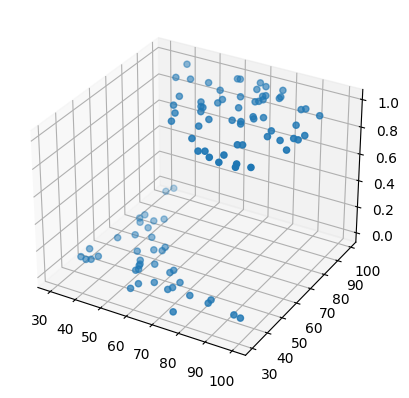

In [ ]:
# Трехмерная визуализация
ax = plt.axes(projection = '3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2])
plt.show()

In [ ]:
#Сгенерировать +5 наборов признаков
df['x1_x2'] = df['x1'] * df['x2'] # умножение признаков
df['x1_pow2'] = df['x1'] ** 2 # возведение в степень
df['x2_pow3'] = df['x2'] ** 3 # возведение в степень
df['x1_x2_pow2'] = (df['x1'] * df['x2']) ** 2 # возведение в степень
df['x1_x2_pow3'] = (df['x1'] * df['x2']) ** 3 # возведение в степень
df

,x1,x2,y,x1_x2,x1_pow2,x2_pow3,x1_x2_pow2,x1_x2_pow3
0,34.623660,78.024693,0,2701.500406,1198.797806,475002.835959,7.298104e+06,1.971583e+10
1,30.286711,43.894998,0,1329.435094,917.284849,84575.599830,1.767398e+06,2.349640e+09
2,35.847409,72.902198,0,2613.354893,1285.036716,387455.533708,6.829624e+06,1.784823e+10
3,60.182599,86.308552,1,5194.273014,3621.945269,642926.746004,2.698047e+07,1.401439e+11
4,79.032736,75.344376,1,5954.672216,6246.173368,427713.077119,3.545812e+07,2.111415e+11
...,...,...,...,...,...,...,...,...
95,83.489163,48.380286,1,4039.229555,6970.440296,113241.415316,1.631538e+07,6.590155e+10
96,42.261701,87.103851,1,3681.156888,1786.051355,660863.959310,1.355092e+07,4.988305e+10
97,99.315009,68.775409,1,6830.430397,9863.470974,325311.603428,4.665478e+07,3.186722e+11
98,55.340018,64.931938,1,3593.334590,3062.517544,273763.217248,1.291205e+07,4.639733e+10


In [ ]:
# Стандартизировать данные, кроме категориального столбца y
df_std = df.copy()
df_std[['x1', 'x2', 'x1_x2', 'x1_pow2', 'x2_pow3', 'x1_x2_pow2', 'x1_x2_pow3']] = (df[['x1', 'x2', 'x1_x2', 'x1_pow2', 'x2_pow3', 'x1_x2_pow2', 'x1_x2_pow3']] - df[['x1', 'x2', 'x1_x2', 'x1_pow2', 'x2_pow3', 'x1_x2_pow2', 'x1_x2_pow3']].mean()) / df[['x1', 'x2', 'x1_x2', 'x1_pow2', 'x2_pow3', 'x1_x2_pow2', 'x1_x2_pow3']].std()
df_std

,x1,x2,y,x1_x2,x1_pow2,x2_pow3,x1_x2_pow2,x1_x2_pow3
0,-1.594216,0.635141,0,-0.921602,-1.368217,0.434263,-0.861476,-0.768384
1,-1.817101,-1.201489,0,-1.693993,-1.478733,-1.023915,-1.186712,-0.895572
2,-1.531325,0.359483,0,-0.971223,-1.334361,0.107289,-0.889025,-0.782062
3,-0.280687,1.080923,1,0.481679,-0.416942,1.061430,0.295958,0.113618
4,0.688062,0.490905,1,0.909738,0.613272,0.257644,0.794491,0.633596
...,...,...,...,...,...,...,...,...
95,0.917087,-0.960121,1,-0.168541,0.897604,-0.916853,-0.331210,-0.430125
96,-1.201681,1.123720,1,-0.370114,-1.137674,1.128422,-0.493775,-0.547442
97,1.730412,0.137407,1,1.402738,2.033344,-0.124808,1.452917,1.421139
98,-0.529558,-0.069422,1,-0.419553,-0.636561,-0.317332,-0.531344,-0.572971


In [ ]:
#Разбить на train/test выборки

x = df_std[['x1', 'x2', 'x1_x2', 'x1_pow2', 'x2_pow3', 'x1_x2_pow2', 'x1_x2_pow3']].values
y = df_std[[ 'y']].values
#test_size=0.6 указывает, что размер валидационной выборки должен составлять 60% от исходного датасета (40% будут использоваться для тренировки модели).
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.6, random_state=42)


print(f"x_train:\n", x_train)
print(f"x_val:\n", x_val)
# Проверка размерности полученных выборок
print("Размерности полученных выборок для train:", x_train.shape, y_train.shape) #количество образцов в обучающей выборке,   количество признаков.
print("Размерности полученных выборок для val:", x_val.shape, y_val.shape) #количество образцов в валидационной выборке, количество признаков

x_train:
 [[ 1.64461889e+00  1.42044097e-01  1.34284172e+00  1.90426405e+00
  -1.20235372e-01  1.36810955e+00  1.31376228e+00]
 [ 4.69293588e-01  1.25426933e+00  1.32631368e+00  3.56236076e-01
   1.34044877e+00  1.34494155e+00  1.28472312e+00]
 [-7.89269324e-01 -8.83476885e-01 -1.03250403e+00 -8.46113857e-01
  -8.78390426e-01 -9.21787124e-01 -7.97725867e-01]
 [ 8.59507074e-01 -1.37782069e+00 -5.58970539e-01  8.24651406e-01
  -1.08950537e+00 -6.32402214e-01 -6.38500848e-01]
 [ 7.34935786e-01  4.27337565e-01  8.95262272e-01  6.70196387e-01
   1.83681781e-01  7.76520813e-01  6.13648816e-01]
 [-8.51655953e-01 -7.71616729e-01 -1.00911587e+00 -8.93464756e-01
  -8.18173903e-01 -9.09447832e-01 -7.91904542e-01]
 [ 5.93515723e-01  2.27963804e-01  6.19379569e-01  5.00441974e-01
  -3.34233653e-02  4.48909390e-01  2.65559973e-01]
 [ 7.52139623e-01  1.39344374e+00  1.72057796e+00  6.91252741e-01
   1.57949522e+00  1.92523293e+00  2.04906892e+00]
 [-1.56017137e+00 -1.03329432e+00 -1.50837106e+00 -1.3

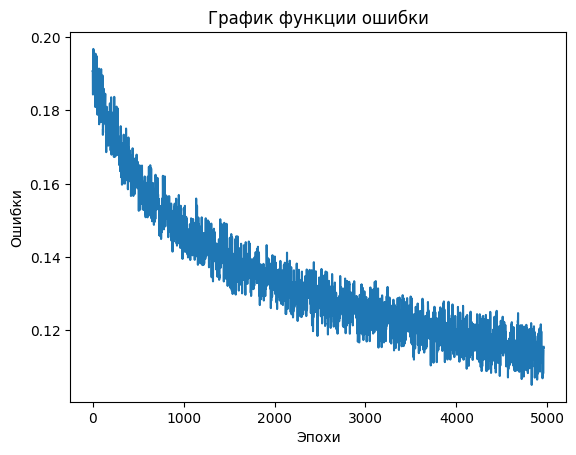

Ошибка: 0.11543102284226012


In [ ]:
# Градиентный спуск с мини-батчами
batch_size = 8
theta = np.random.uniform(size=(1, 7))
x0 = np.ones((len(x_train), 1))
epochs = 1000
alpha = 0.008

matrix = np.column_stack((x0, x_train, y_train))
error = []

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def calc(matrix, batch_size, alpha, theta, t_size, epoch):

    for i in range(epoch):
        np.random.shuffle(matrix)
        for j in range(math.ceil(len(x_train) / batch_size)):
            batch_x = matrix[j * batch_size: j * batch_size + batch_size, :t_size]
            batch_y = matrix[j * batch_size: j * batch_size + batch_size, -1:]
            z = theta @ batch_x.T
            h = sigmoid(z)
            theta -= alpha * ((h - batch_y.T) @ batch_x) / len(batch_x)
            z = theta @ batch_x.T
            h = sigmoid(z)
            err = (-batch_y.T * np.log(h) - (1 - batch_y.T) * np.log(1 - h)).mean()
            error.append(err)
    return error

error = calc(matrix, batch_size, alpha, theta, 7, epochs)

# График функции ошибки
window = len(x_train)
for i in range(len(error) - window):
    error[i] = sum(error[i:i + window]) / window
error = error[:-window]

yplot = np.array(error)
xplot = np.array(range(0, len(error)))
plt.plot(xplot, yplot)
plt.xlabel('Эпохи')
plt.ylabel('Ошибки')
plt.title('График функции ошибки')
plt.show()
print("Ошибка:", error[-1])

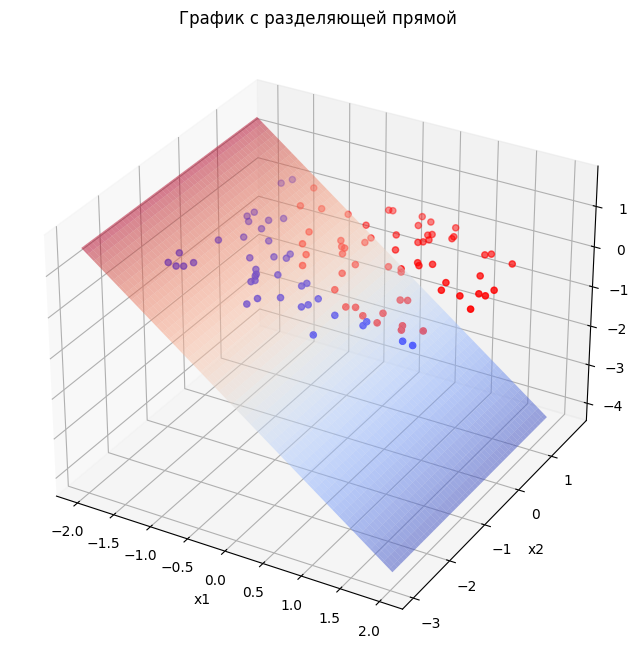

0.11703984479492521


In [ ]:
# График разделяющей прямой
# Две отдельные выборки данных
data_std_0 = df_std[df_std['y'] == 0]
data_std_1 = df_std[df_std['y'] == 1]

# Создание сетки точек для отображения разделяющей прямой
x1_values = np.linspace(-2, 2, 100)
x2_values = x2_values = -(theta[0][2] + theta[0][3] * x1_values) / theta[0][1] #-(theta[0][0] + theta[0][1] * x1_values) / theta[0][2] #np.linspace(-2, 2, 100)
x1_grid, x2_grid = np.meshgrid(x1_values, x2_values)
y_grid = -(theta[0][0] + theta[0][1] * x1_grid) / theta[0][2]

# Создание 3D графика
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Отображение точек данных
ax.scatter(df_std.loc[df_std['y'] == 0, 'x1'], df_std.loc[df_std['y'] == 0, 'x2'], c='b')
ax.scatter(df_std.loc[df_std['y'] == 1, 'x1'], df_std.loc[df_std['y'] == 1, 'x2'], c='r')


# Отображение разделяющей прямой
ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.5, cmap='coolwarm')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('График с разделяющей прямой')

plt.show()

print(error[-1])

In [ ]:
#График accuracy
def predict(theta, x):
    h = 1 / (1 + np.exp(-(theta @ x_train.T)))
    return (h >= 0.5).astype(int)

accuracy_values = []

for theta in range(100):
  x_val = np.column_stack((np.ones((len(x_val), 1)), x_val))
  predictions = predict(theta, x_val)
  accuracy = (predictions == y_val).mean() * 100
  accuracy_values.append(accuracy)

window = len(x_train)
for i in range(len(accuracy_values) - window):
    accuracy_values[i] = sum(accuracy_values[i:i + window]) / window
accuracy_values = accuracy_values[:-window]

# Построение графика точности
yplot = np.array(accuracy_values)
xplot = np.array(range(0, len(accuracy_values)))
plt.plot(xplot, yplot)
plt.xlabel('Theta Value')
plt.ylabel('Accuracy')
plt.title('График Accuracy')
plt.show()
print("Accuracy:", accuracy)

ValueError: matmul: Input operand 0 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)